In [1]:
#Generate data
import numpy as np

n = 100
synthetic_data = np.empty((n*n,3))

x = np.linspace(1,20,n)
y = np.linspace(1,20,n)

for i in range(n):
    for j in range(n):
        synthetic_data[i+j*n-1,:] = np.array([x[i],y[j],0.5*(x[i]-10.0)**2-2*y[j]])
        #synthetic_data[i+j*n-1,:] = np.array([x[i],0.5*(x[i]-10.0)**2-2*y[j],y[j]])


#Shuffle contents
np.random.shuffle(synthetic_data)

<IPython.core.display.Javascript object>


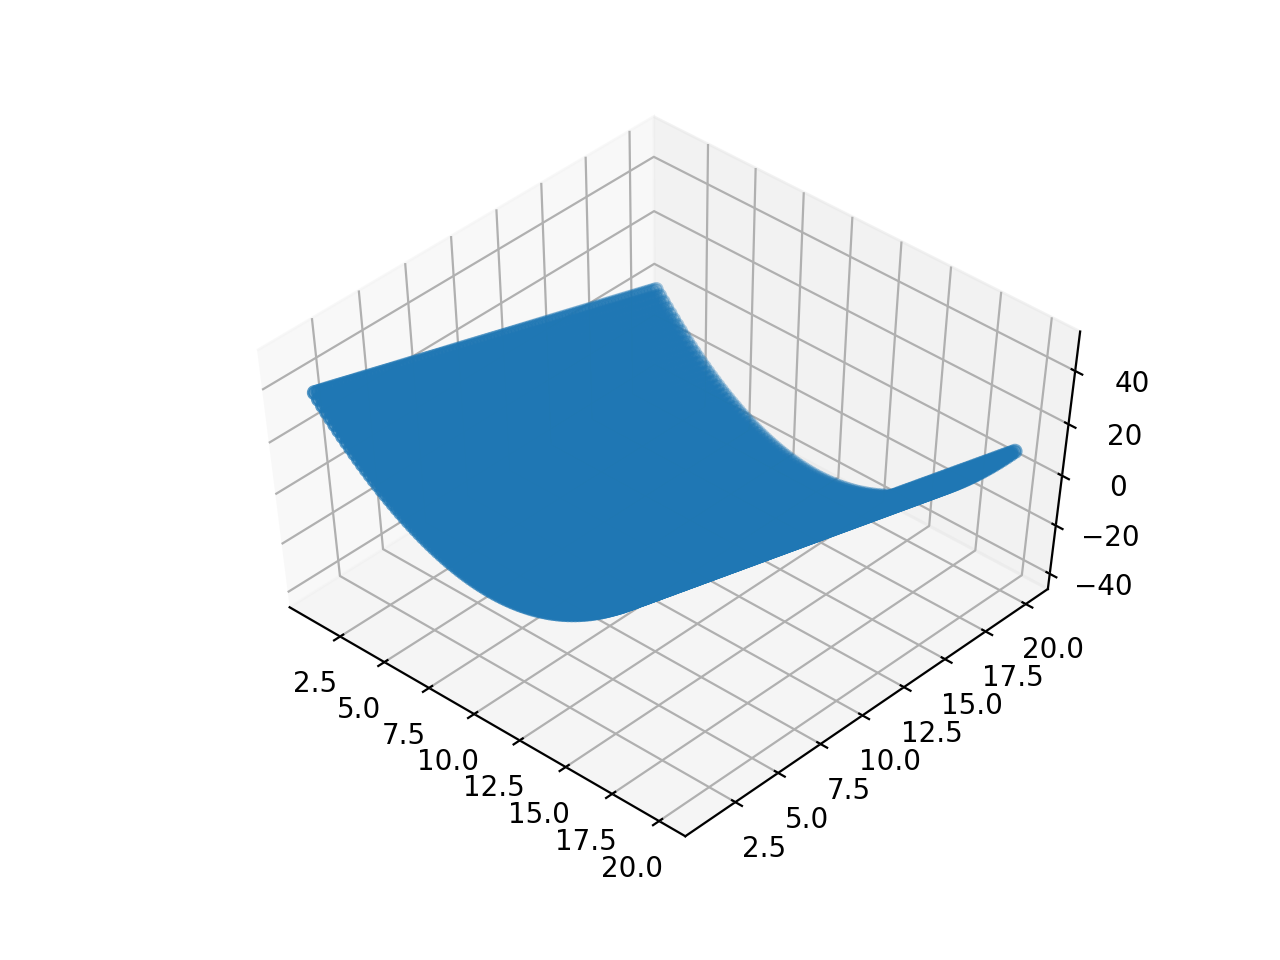

In [2]:
#Graph this data to be sure it is what we want
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_data[:,0], synthetic_data[:,1], synthetic_data[:,2])

In [3]:
#Helper functions
def normalise(x):
    """Convert values to range 0-1"""
    x_h = (x - x.min())*1.0 / (x.max() - x.min())
    
    return x_h, x.min(), x.max()

def un_normalise(x_h, x_min, x_max):
    """Convert values from range 0-1 back to normal"""
    x = (x_max-x_min)*x_h + x_min
    
    return x

In [4]:
#amount of dimensions we want to reduce the data to
# i.e. from 3D to 2D/the amount of eigenvectors we want to retain
dim = 2

#Prepare for PCA
mean_x = np.mean(synthetic_data[:,0])
mean_y = np.mean(synthetic_data[:,1])
mean_z = np.mean(synthetic_data[:,2])
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

#Scatter Matrix Generation
scatter_matrix = np.zeros((3,3))
for i in range(synthetic_data.shape[0]):
    scatter_matrix += (synthetic_data[i,:].reshape(3,1) - mean_vector).dot((synthetic_data[i,:].reshape(3,1)
                                                                            - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

cov_mat = np.cov([synthetic_data[:,0],synthetic_data[:,1],synthetic_data[:,2]])
print('Covariance Matrix:\n', cov_mat)

#print scatter_matrix/cov_mat


#Calculate eigenvectors and eigenvalues, from either scatter or covariance
#matrix since one is just a scaled version of the other
eig_val, eig_vec = np.linalg.eig(cov_mat)

print eig_val
print eig_vec
#Sanity checking that the eigenvectors norm is 1 (i.e. unit vectors)
for ev in eig_vec:
    print np.linalg.norm(ev)
    
#Get order and reduce the vectors to the desired dimension
order =  np.argsort(eig_val)[::-1][:dim]
W = eig_vec[order]

('Scatter Matrix:\n', array([[  3.06910774e+05,   2.93098879e-12,   1.53455387e+05],
       [  2.93098879e-12,   3.06910774e+05,  -6.13821549e+05],
       [  1.53455387e+05,  -6.13821549e+05,   3.18769004e+06]]))
('Covariance Matrix:\n', array([[  3.06941469e+01,   2.62927105e-17,   1.53470734e+01],
       [  2.62927105e-17,   3.06941469e+01,  -6.13882937e+01],
       [  1.53470734e+01,  -6.13882937e+01,   3.18800884e+02]]))
[ 332.08609379   30.69414686   17.40893699]
[[  4.98341598e-02   9.70142500e-01   2.37360666e-01]
 [ -1.99336639e-01   2.42535625e-01  -9.49442665e-01]
 [  9.78663099e-01   2.06010923e-16  -2.05471505e-01]]
1.0
1.0
1.0


[[  7.71717172   9.82828283 -17.05091317]
 [ 16.16161616  10.78787879  -2.59300071]
 [  8.1010101   17.88888889 -33.97469646]
 ..., 
 [  8.86868687   1.38383838  -2.12774207]
 [ 12.13131313  17.88888889 -33.50652995]
 [ 15.39393939   7.33333333  -0.11937557]]
[[  7.39708427  20.32828283 -20.30868397]
 [ 10.66090011  21.28787879  -4.76309225]
 [  4.01013014  28.38888889 -36.4407848 ]
 ..., 
 [ 10.44656093  11.88383838  -5.78399218]
 [  4.27442602  28.38888889 -35.18194051]
 [ 11.12590471  17.83333333  -2.54827006]]


<IPython.core.display.Javascript object>


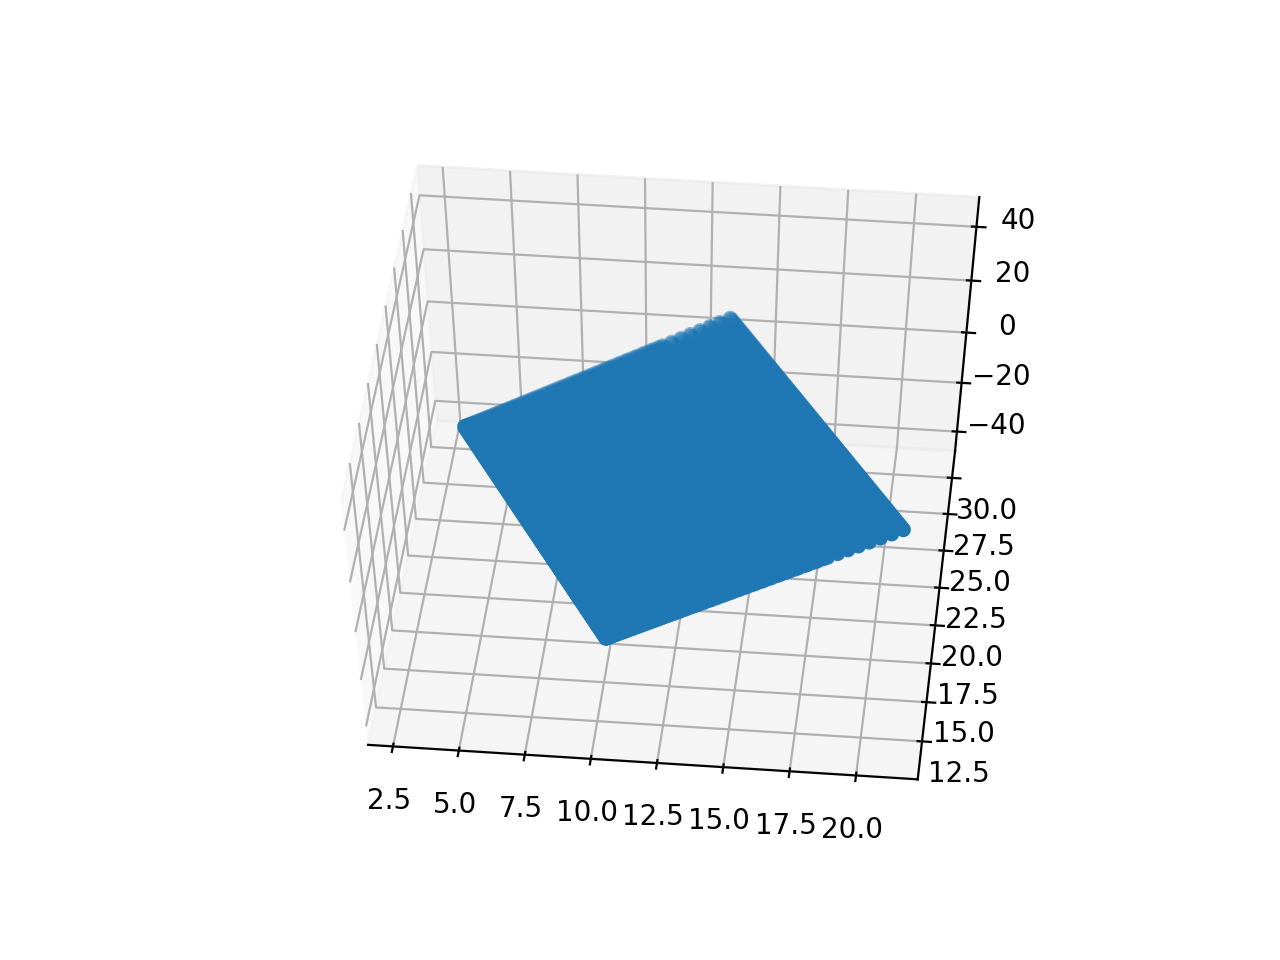

In [5]:
#Now we have a W matrix (the remaining eigenvectors) we can scale the data to a 2D representation by performing
#y = Wx
transformed = np.dot(W,synthetic_data.T).T


#TODO - we've removed the scaling so need to add that again
reconstructed_data = np.dot(transformed,W) + mean_vector.T

print synthetic_data
print reconstructed_data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], reconstructed_data[:,2])

In [6]:
#np.savetxt('reconstructed.csv', reconstructed_data, delimiter=",")
#np.savetxt('synthetic.csv', synthetic_data, delimiter=",")